In [2]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]
# Restart runtime
!pip install ultralytics
# Colab related installations to install pyproject.toml projects correctly
!sudo apt install libcairo2-dev pkg-config
!pip3 install pycairo
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install python-doctr[tf]@git+https://github.com/mindee/doctr.git
# PyTorch
!pip3 install python-doctr[torch]@git+https://github.com/mindee/doctr.git
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y
!pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 64.5 MB/s eta 0:00:00
  Using cac

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import cv2
from ultralytics import YOLO
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import os
from inference_sdk import InferenceHTTPClient

# Carregando modelo OCR e e o modelo Placa

In [6]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)
# Carrega o modelo de detecção de placas
model = YOLO('license_plate_detector.pt')

In [14]:
single_img_doc = DocumentFile.from_images('/content/plates/plate_9.jpg')
ocr_result = predictor(single_img_doc)

In [16]:
single_img_doc = DocumentFile.from_images('/content/plates/id_3_velocidade_10.jpg')
ocr_result = predictor(single_img_doc)

In [17]:
ocr_result

Document(
  (pages): [Page(
    dimensions=(390, 732)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='-', confidence=0.51)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='-', confidence=0.51)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='SYBGH84', confidence=0.67)]
        )]
        (artefacts): []
      ),
    ]
  )]
)

In [20]:
CLIENT = InferenceHTTPClient(
                api_url="https://infer.roboflow.com",
                api_key="sGTAqNQmiPb1fo72CDJd"
            )

result = CLIENT.ocr_image(inference_input="/content/plates/plate_2.jpg")  # single image request
print(result)

{'result': '', 'time': 1.470007257999896, 'parent_id': None}


In [21]:
# Abre o vídeo
video_path = '/content/drive/MyDrive/testplaca.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
plate_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Realiza a detecção na frame atual
    results = model(frame)

    # Verifica se há alguma detecção
    if results[0].boxes:
        # Itera sobre as detecções
        for result in results[0].boxes:  # xyxy form is [x1, y1, x2, y2, confidence, class]
            x1, y1, x2, y2 = map(int, result.xyxy[0])  # Converte para inteiros
            confidence = result.conf[0]
            cls = result.cls[0]

            # Recorta a placa da imagem
            plate_img = frame[y1:y2, x1:x2]

            # Salva a imagem recortada
            img_path = f'plates/plate_{plate_count}.jpg'
            cv2.imwrite(img_path, plate_img)
            #aplica contraste para destacar contorno no caso das letras da placa do carro para deixar nítido para o OCR conseguir visualizar melhor


            single_img_doc = DocumentFile.from_images(img_path)
            ocr_result = predictor(single_img_doc)

            print(ocr_result)


            plate_count += 1

    frame_count += 1

cap.release()
cv2.destroyAllWindows()



0: 384x640 (no detections), 127.6ms
Speed: 3.1ms preprocess, 127.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 122.3ms
Speed: 2.7ms preprocess, 122.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 122.6ms
Speed: 2.6ms preprocess, 122.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 124.2ms
Speed: 2.8ms preprocess, 124.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 122.5ms
Speed: 2.9ms preprocess, 122.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 124.9ms
Speed: 2.7ms preprocess, 124.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 123.6ms
Speed: 3.6ms preprocess, 123.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 license_plate, 120.7ms
Speed: 2.7ms prepr

KeyboardInterrupt: 

In [26]:
!pip install opencv-python==4.5.5.64

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-sdk 0.14.0 requires opencv-python>=4.8.0.0, but you have opencv-python 4.5.5.64 which is incompatible.
ultralytics 8.2.55 requires opencv-python>=4.6.0, but you have opencv-python 4.5.5.64 which is incompatible.


Document(
  (pages): [Page(
    dimensions=(63, 112)
    (blocks): []
  )]
)


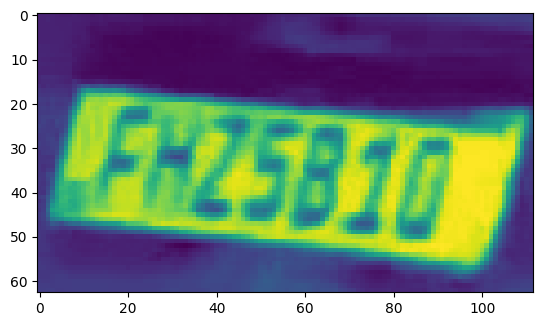

In [35]:
# prompt: Como aplicar contraste para destacar contorno no caso das letras da placa do carro para deixar nítido para o OCR conseguir visualizar melhor, use outro método sem ser cv2.cvtcolor, converta a imagem de outra forma
#           ?

import cv2
import numpy as np

def apply_contrast(img):
  """
  Applies contrast to an image using the CLAHE (Contrast Limited Adaptive Histogram Equalization) algorithm.

  Args:
    img: The image to apply contrast to.

  Returns:
    The image with contrast applied.
  """

  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
  img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
  img = cv2.cvtColor(img_yuv, cv2.COLOR_BGRA2GRAY)
  return img

# Load the image
img = cv2.imread('/content/plates/plate_2.jpg')

# Apply contrast
img_with_contrast = apply_contrast(img)
cv2.imwrite('img_with_contrast.jpg', img_with_contrast)

# OCR
single_img_doc = DocumentFile.from_images('/content/img_with_contrast.jpg')
ocr_result = predictor(single_img_doc)
print(ocr_result)

# Display the image with contrast
plt.imshow(img_with_contrast)
plt.show()


In [36]:
# OCR
single_img_doc = DocumentFile.from_images('/content/img_with_contrast.jpg')
ocr_result = predictor(single_img_doc)
print(ocr_result)

Document(
  (pages): [Page(
    dimensions=(63, 112)
    (blocks): []
  )]
)


In [37]:
import os
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://infer.roboflow.com",
    api_key="sGTAqNQmiPb1fo72CDJd"
)

result = CLIENT.ocr_image(inference_input="/content/img_with_contrast.jpg")  # single image request
print(result)


{'result': '', 'time': 1.4018418209998345, 'parent_id': None}
